In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
sc.settings.verbosity = 3             
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=96)

results_file = './lung_dev_covid.h5ad'

/Users/kropskja/opt/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.6 anndata==0.7.1 umap==0.4.1 numpy==1.18.4 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.6.1.post1


In [2]:
#e18
e18a = sc.read_10x_mtx(
    './E18/filtered_feature_bc_matrix/',  
    var_names='gene_symbols', gex_only=True,                 
    cache=True)
e18a.var_names_make_unique()


#p0
p0a = sc.read_10x_mtx(
    './P0/filtered_feature_bc_matrix/',  
    var_names='gene_symbols', gex_only=True,                  
    cache=True)
p0a.var_names_make_unique()

p0b = sc.read_10x_mtx(
    './P0_2/filtered_feature_bc_matrix/',  
    var_names='gene_symbols',   gex_only=True,                
    cache=True)
p0b.var_names_make_unique()


#p7
p7a = sc.read_10x_mtx(
    './P7/filtered_feature_bc_matrix/',  
    var_names='gene_symbols', gex_only=True,                  
    cache=True)
p7a.var_names_make_unique()

p7b = sc.read_10x_mtx(
    './P7_enriched/filtered_feature_bc_matrix',  
    var_names='gene_symbols',   gex_only=True,                
    cache=True)
p7b.var_names_make_unique()

#p14
p14a = sc.read_10x_mtx(
    './P14/filtered_feature_bc_matrix/',  
    var_names='gene_symbols',  gex_only=True,                 
    cache=True)
p14a.var_names_make_unique()

p14b = sc.read_10x_mtx(
    './P14_2/filtered_feature_bc_matrix/',  
    var_names='gene_symbols',    gex_only=True,               
    cache=True)
p14b.var_names_make_unique()

#p64
p64a = sc.read_10x_mtx(
    './Adult/filtered_feature_bc_matrix',  
    var_names='gene_symbols',      gex_only=True,             
    cache=True)
p64a.var_names_make_unique()

p64b = sc.read_10x_mtx(
    './Adult_2/filtered_feature_bc_matrix/',  
    var_names='gene_symbols',       gex_only=True,            
    cache=True)
p64b.var_names_make_unique()

... reading from cache file cache/E18-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/P0-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/P0_2-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/P7-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/P7_enriched-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/P14-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/P14_2-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/Adult-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/Adult_2-filtered_feature_bc_matrix-matrix.h5ad


In [3]:
#concatenate timepoints
p0 = p0a.concatenate(p0b, batch_key='library', batch_categories=['p0a', 'p0b'])
p7 = p7a.concatenate(p7b, batch_key='library', batch_categories=['p7a', 'p7b'])
p14 = p14a.concatenate(p14b, batch_key='library', batch_categories=['p014a', 'p14b'])
p64 = p64a.concatenate(p64b, batch_key='library', batch_categories=['p64a', 'p64b'])

In [4]:
time_series = e18a.concatenate(p0, p7, p14, p64, batch_key='timepoint', batch_categories=['E18', 'P0', 'P7', 'P14', 'P64'])


normalizing counts per cell
    finished (0:00:02)


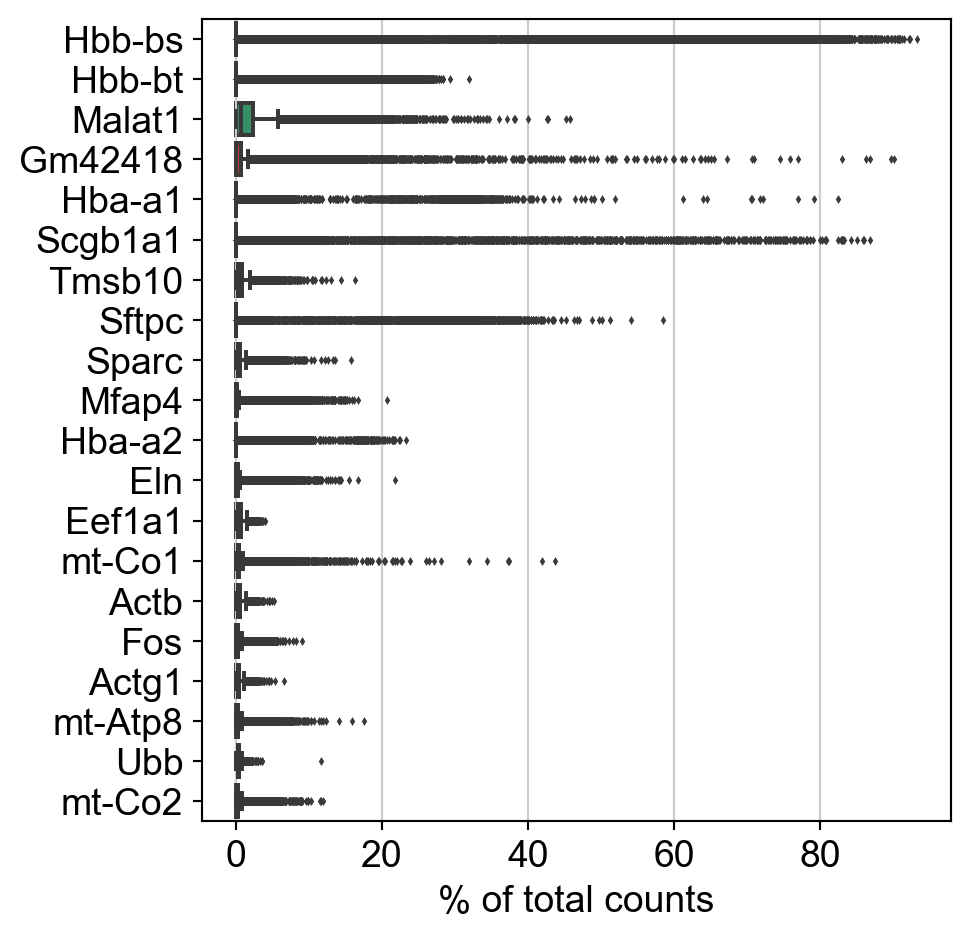

filtered out 14606 cells that have less than 500 genes expressed
filtered out 9710 genes that are detected in less than 3 cells


In [5]:
sc.pl.highest_expr_genes(time_series, n_top=20, )
sc.pp.filter_cells(time_series, min_genes=500)
sc.pp.filter_genes(time_series, min_cells=3)


mito_genes = time_series.var_names.str.startswith('mt-')
time_series.obs['percent_mito'] = np.sum(
    time_series[:, mito_genes].X, axis=1).A1 / np.sum(time_series.X, axis=1).A1
time_series.obs['n_counts'] = time_series.X.sum(axis=1).A1
time_series = time_series[time_series.obs.n_genes < 5000, :]
time_series = time_series[time_series.obs.percent_mito < 0.1, :]

In [6]:
time_series = time_series.copy()

In [7]:
sc.pp.normalize_total(time_series, target_sum=1e4, exclude_highly_expressed=True)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['Col3a1', 'Fn1', 'Igfbp5', 'Tnnt2', 'Mpz', 'Hspa5', 'Gsn', 'Actc1', 'Cst3', 'Bpifa2', 'Bpifa1', 'Bpifb1', 'Wfdc2', 'Tmsb4x', 'Fabp4', 'Postn', 'S100a6', 'S100a8', 'S100a9', 'Clca1', 'Cyr61', 'Ccl21a', 'Jun', 'Nppa', 'Igfbp7', 'Alb', 'Cxcl10', 'Spp1', 'Eln', 'Cldn4', 'Hspb1', 'Col1a2', 'Tmsb10', 'Actg2', 'Mgp', 'Apoe', 'Hbb-bt', 'Hbb-bs', 'Nupr1', 'Mylpf', 'Col10a1', 'Dcn', 'Lyz2', 'Lyz1', 'Col4a1', 'Hhip', 'Junb', 'Mt1', 'Hp', 'Acta1', 'Sftpa1', 'Myh6', 'Sftpc', 'Tagln', 'Tpm1', 'Gpx1', 'Ngp', 'Lars2', 'Myl7', 'Hba-a1', 'Hba-a2', 'Scgb3a1', 'Sparc', 'Mfap4', 'Col1a1', 'Tcap', 'Myl4', 'H3f3b', 'Actg1', 'Cbr2', 'Tubb2a', 'Tgfbi', 'Fos', 'Serpina1e', 'Dlk1', 'Psca', 'Ahsg', 'Stfa1', 'Retnla', 'Msln', 'Tff2', 'Ager', 'Gm26917', 'Gm42418', 'AY036118', 'C3', 'Egr1', 'Scgb3a2', 'Cd74', 'Malat1', 'Scgb1a1', 'Fth1', 'Acta2']
    finished (0:00:04)


In [8]:
sc.pp.log1p(time_series)
time_series.raw = time_series

extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


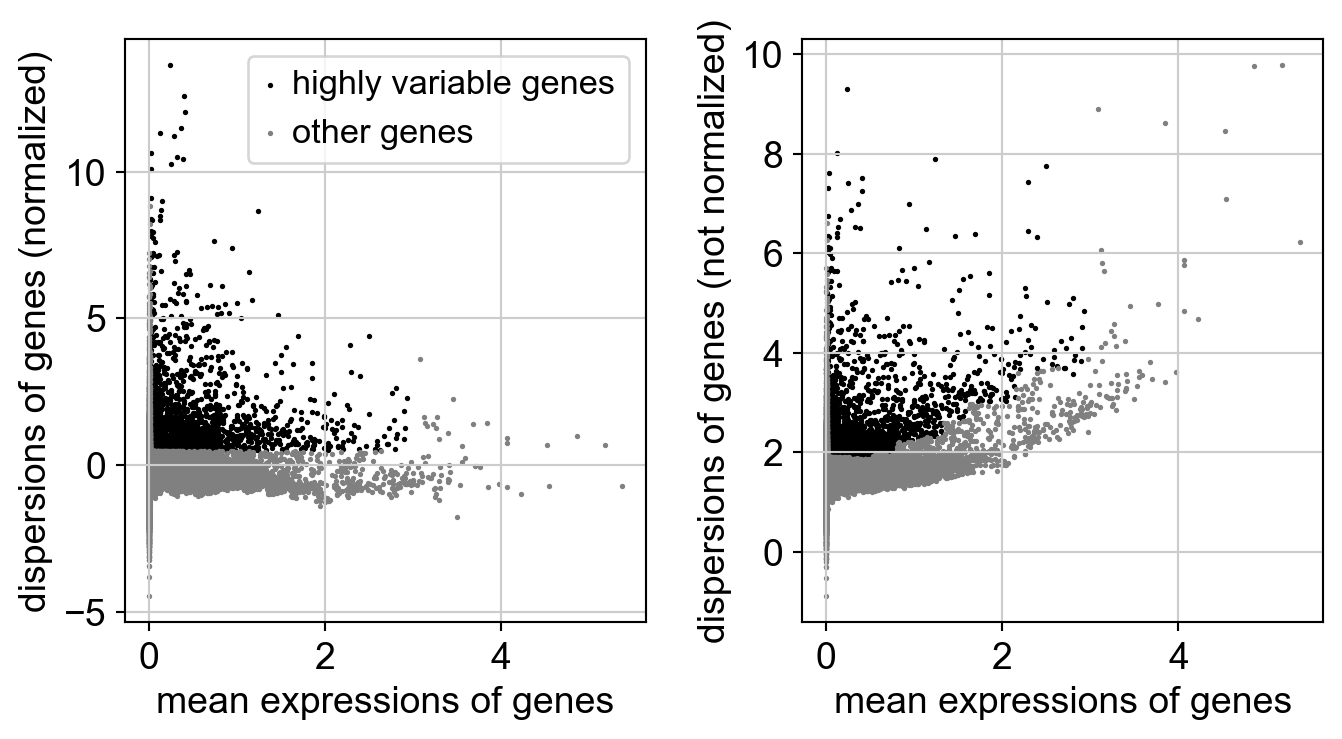

In [9]:
sc.pp.highly_variable_genes(time_series, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(time_series)
time_series = time_series[:, time_series.var.highly_variable]

In [10]:
sc.pp.regress_out(time_series, ['n_counts', 'percent_mito'])
sc.pp.scale(time_series, max_value=10)

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use


/Users/kropskja/opt/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1172: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'library' as categorical


    finished (0:02:01)


In [11]:
sc.tl.pca(time_series, svd_solver='arpack')
sc.pp.neighbors(time_series, n_neighbors=10, n_pcs=30)
sc.tl.umap(time_series)

    on highly variable genes
computing PCA with n_comps = 50
    finished (0:00:11)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:24)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:55)


running Leiden clustering
    finished: found 40 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:38)


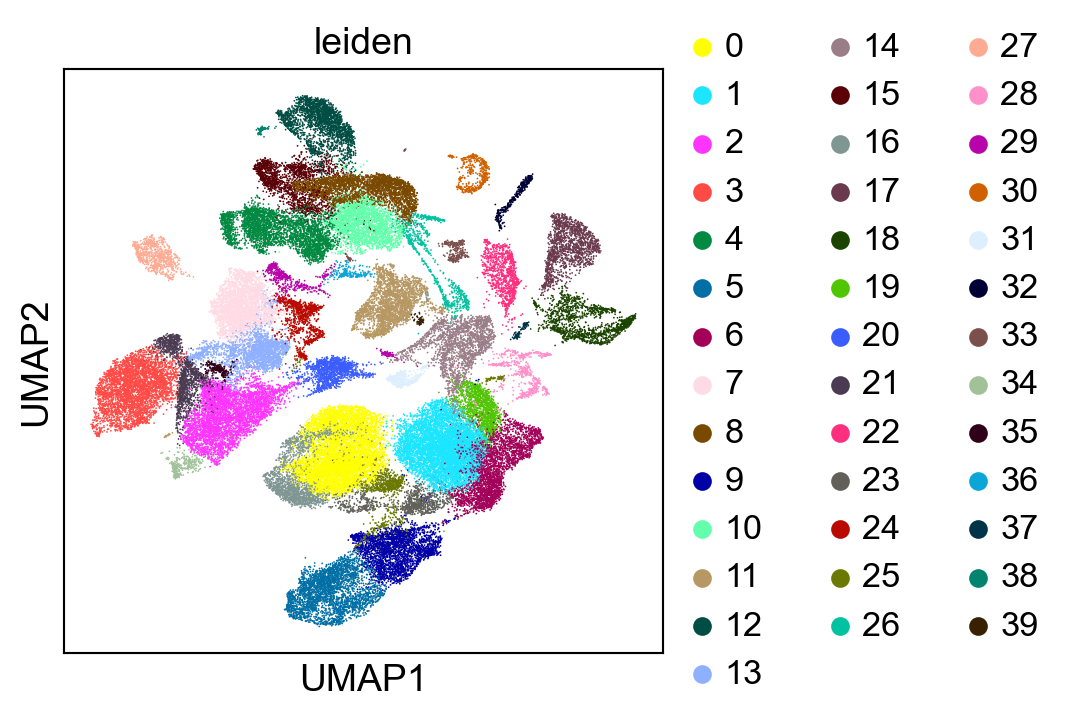

In [12]:
sc.tl.leiden(time_series, resolution=0.8)
sc.pl.umap(time_series, color = ['leiden'])

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


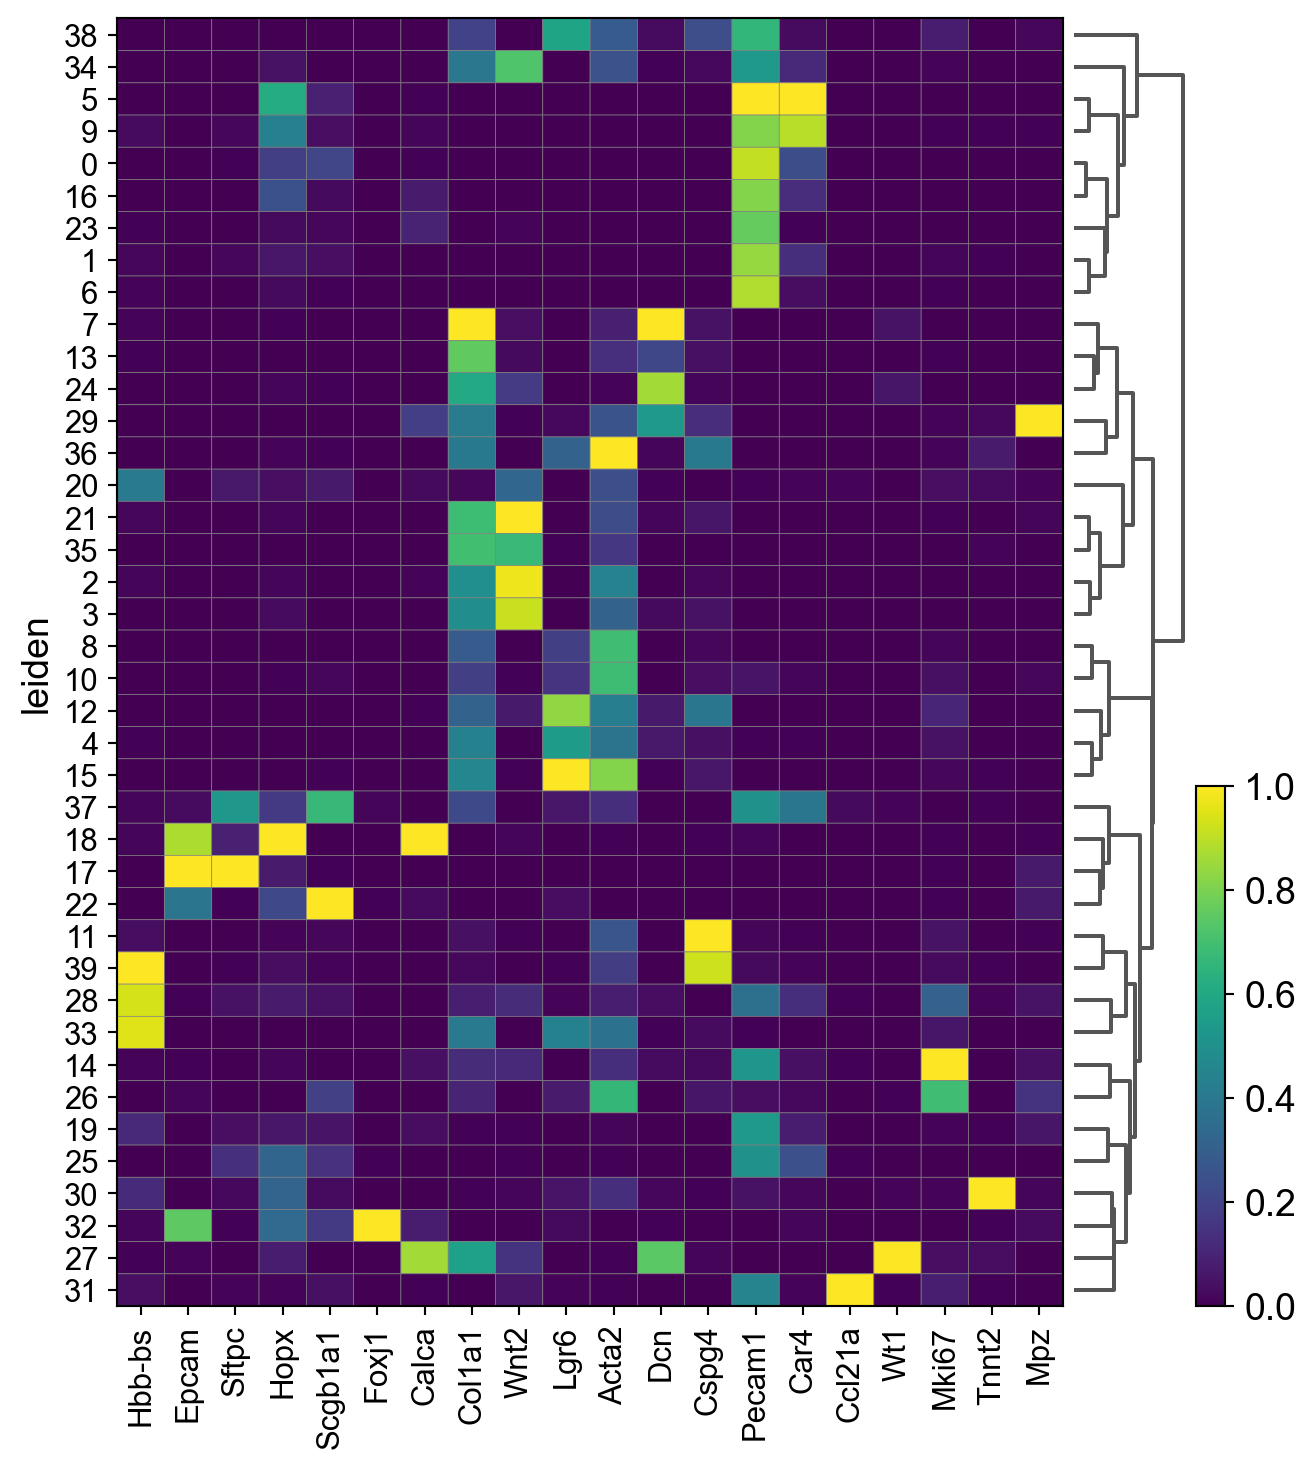

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[6.4, 0.8, 0.2])

In [13]:
sc.tl.dendrogram(time_series, groupby='leiden')
marker_genes = ['Hbb-bs','Epcam','Sftpc', 'Hopx', 'Scgb1a1', 'Foxj1', 'Calca', 'Col1a1', 'Wnt2', 'Lgr6', 'Acta2', 'Dcn', 'Cspg4','Pecam1', 'Car4', 'Ccl21a', 'Wt1', 'Mki67', 'Tnnt2', 'Mpz']
sc.pl.matrixplot(time_series, marker_genes, standard_scale='var', dendrogram=True, groupby='leiden')

In [14]:
#Remove RBC and doublets (clusters 28,33,34,37,38,39)
clean = time_series[time_series.obs['leiden'].isin(['0','1', '2', '3', '4', '5', '6','7', '8', '9', '10', '11', '12', '13', '14', '15','16', '17', '18','19','21', '22', '23', '24', '25', '26', '27', '29', '30','31','32', '35', '36'])]
sc.tl.pca(clean, svd_solver='arpack')
sc.pp.neighbors(clean, n_neighbors=10, n_pcs=40)
sc.tl.umap(clean)

    on highly variable genes
computing PCA with n_comps = 50
    finished (0:00:21)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:14)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:52)


computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	'distances', weighted adjacency matrix
	'connectivities', weighted adjacency matrix (0:00:19)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:11)


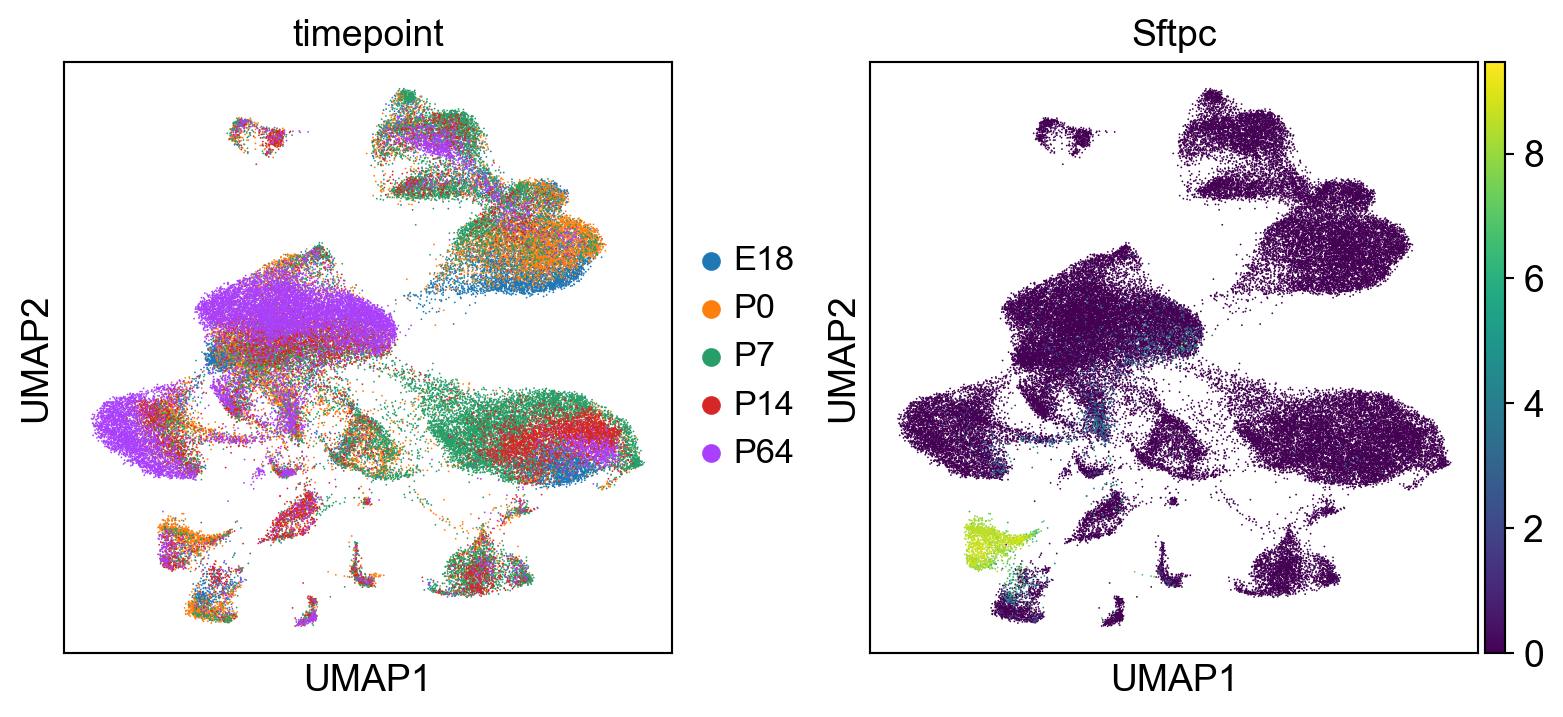

In [15]:
sc.external.pp.bbknn(clean, batch_key='library')  # running bbknn 1.3.6

sc.tl.umap(clean)
sc.pl.umap(clean, color=['timepoint', 'Sftpc'])

running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:54)


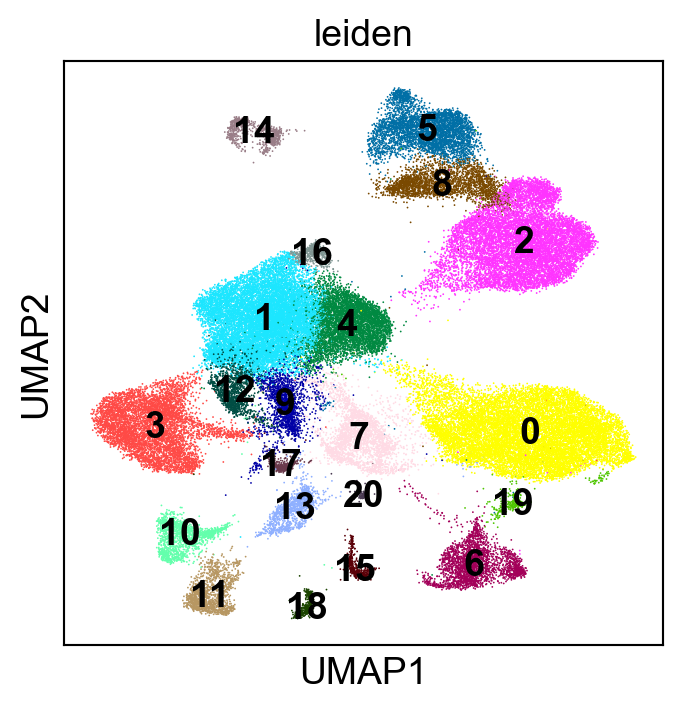

In [16]:
sc.tl.leiden(clean, resolution=0.8)
sc.pl.umap(clean, color = ['leiden'], legend_loc='on data')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


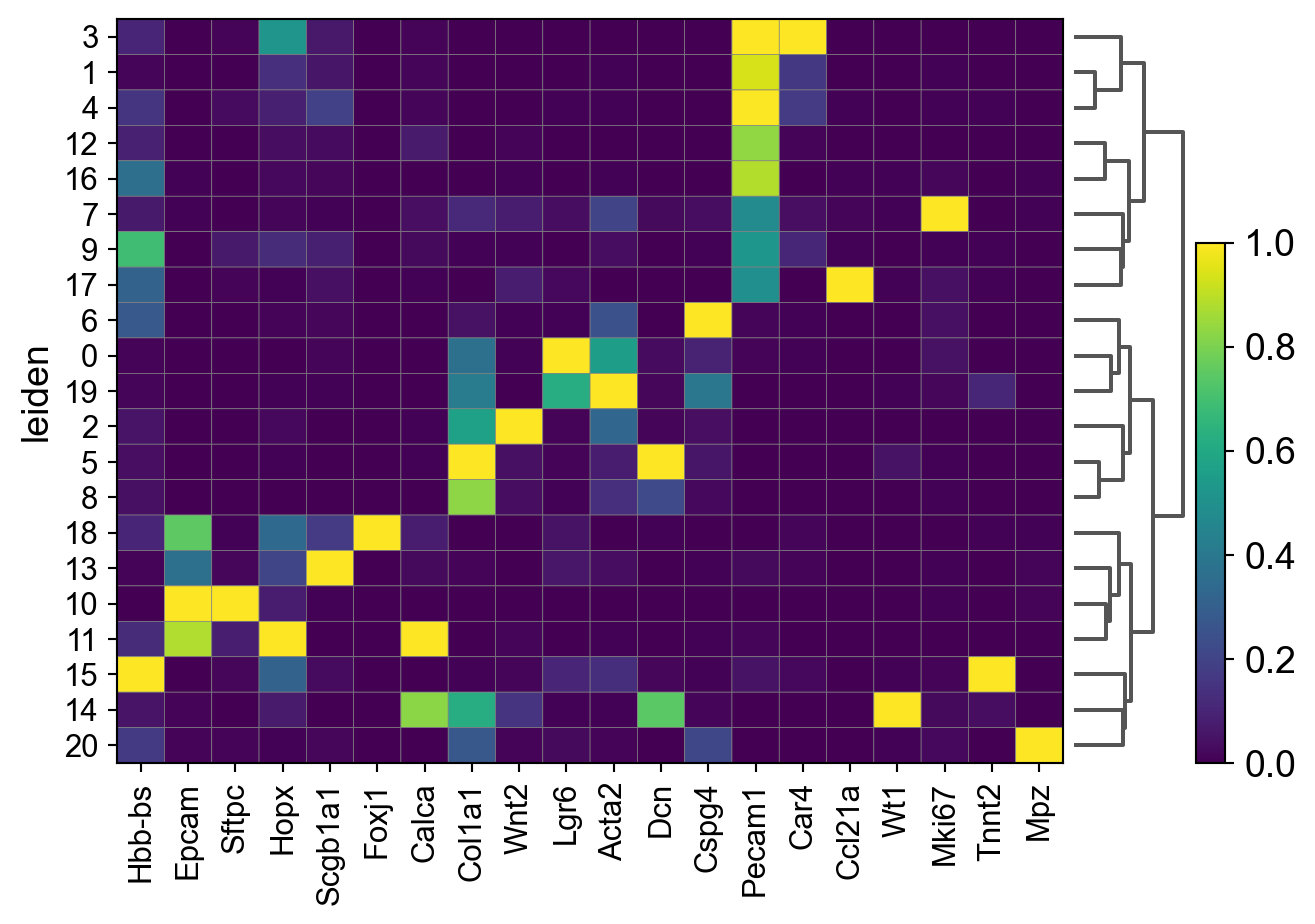

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[6.4, 0.8, 0.2])

In [17]:
sc.tl.dendrogram(clean, groupby='leiden')
marker_genes = ['Hbb-bs','Epcam','Sftpc', 'Hopx', 'Scgb1a1', 'Foxj1', 'Calca', 'Col1a1', 'Wnt2', 'Lgr6', 'Acta2', 'Dcn', 'Cspg4','Pecam1', 'Car4', 'Ccl21a', 'Wt1', 'Mki67', 'Tnnt2', 'Mpz']
sc.pl.matrixplot(clean, marker_genes, standard_scale='var', dendrogram=True, groupby='leiden')

In [18]:
new_cluster_names =[
    'MyoFB',
    'Endothelial 1',
    'FB1',
    'Endothelial - capillary',
    'Endothelial 2',
    'FB2',
    'Pericyte',
    'Proliferating',
    'FB3',
    'Endothelial 3',
    'AT2',
    'AT1',
    'Endothelial 4',
    'Secretory',
    'Mesothelial',
    'Cardiomyocyte',
    'Endothelial 5',
    'Lymphatic',
    'Ciliated',
    'SMC',
    'Neuronal'

]

clean.rename_categories('leiden', new_cluster_names)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:03:21)


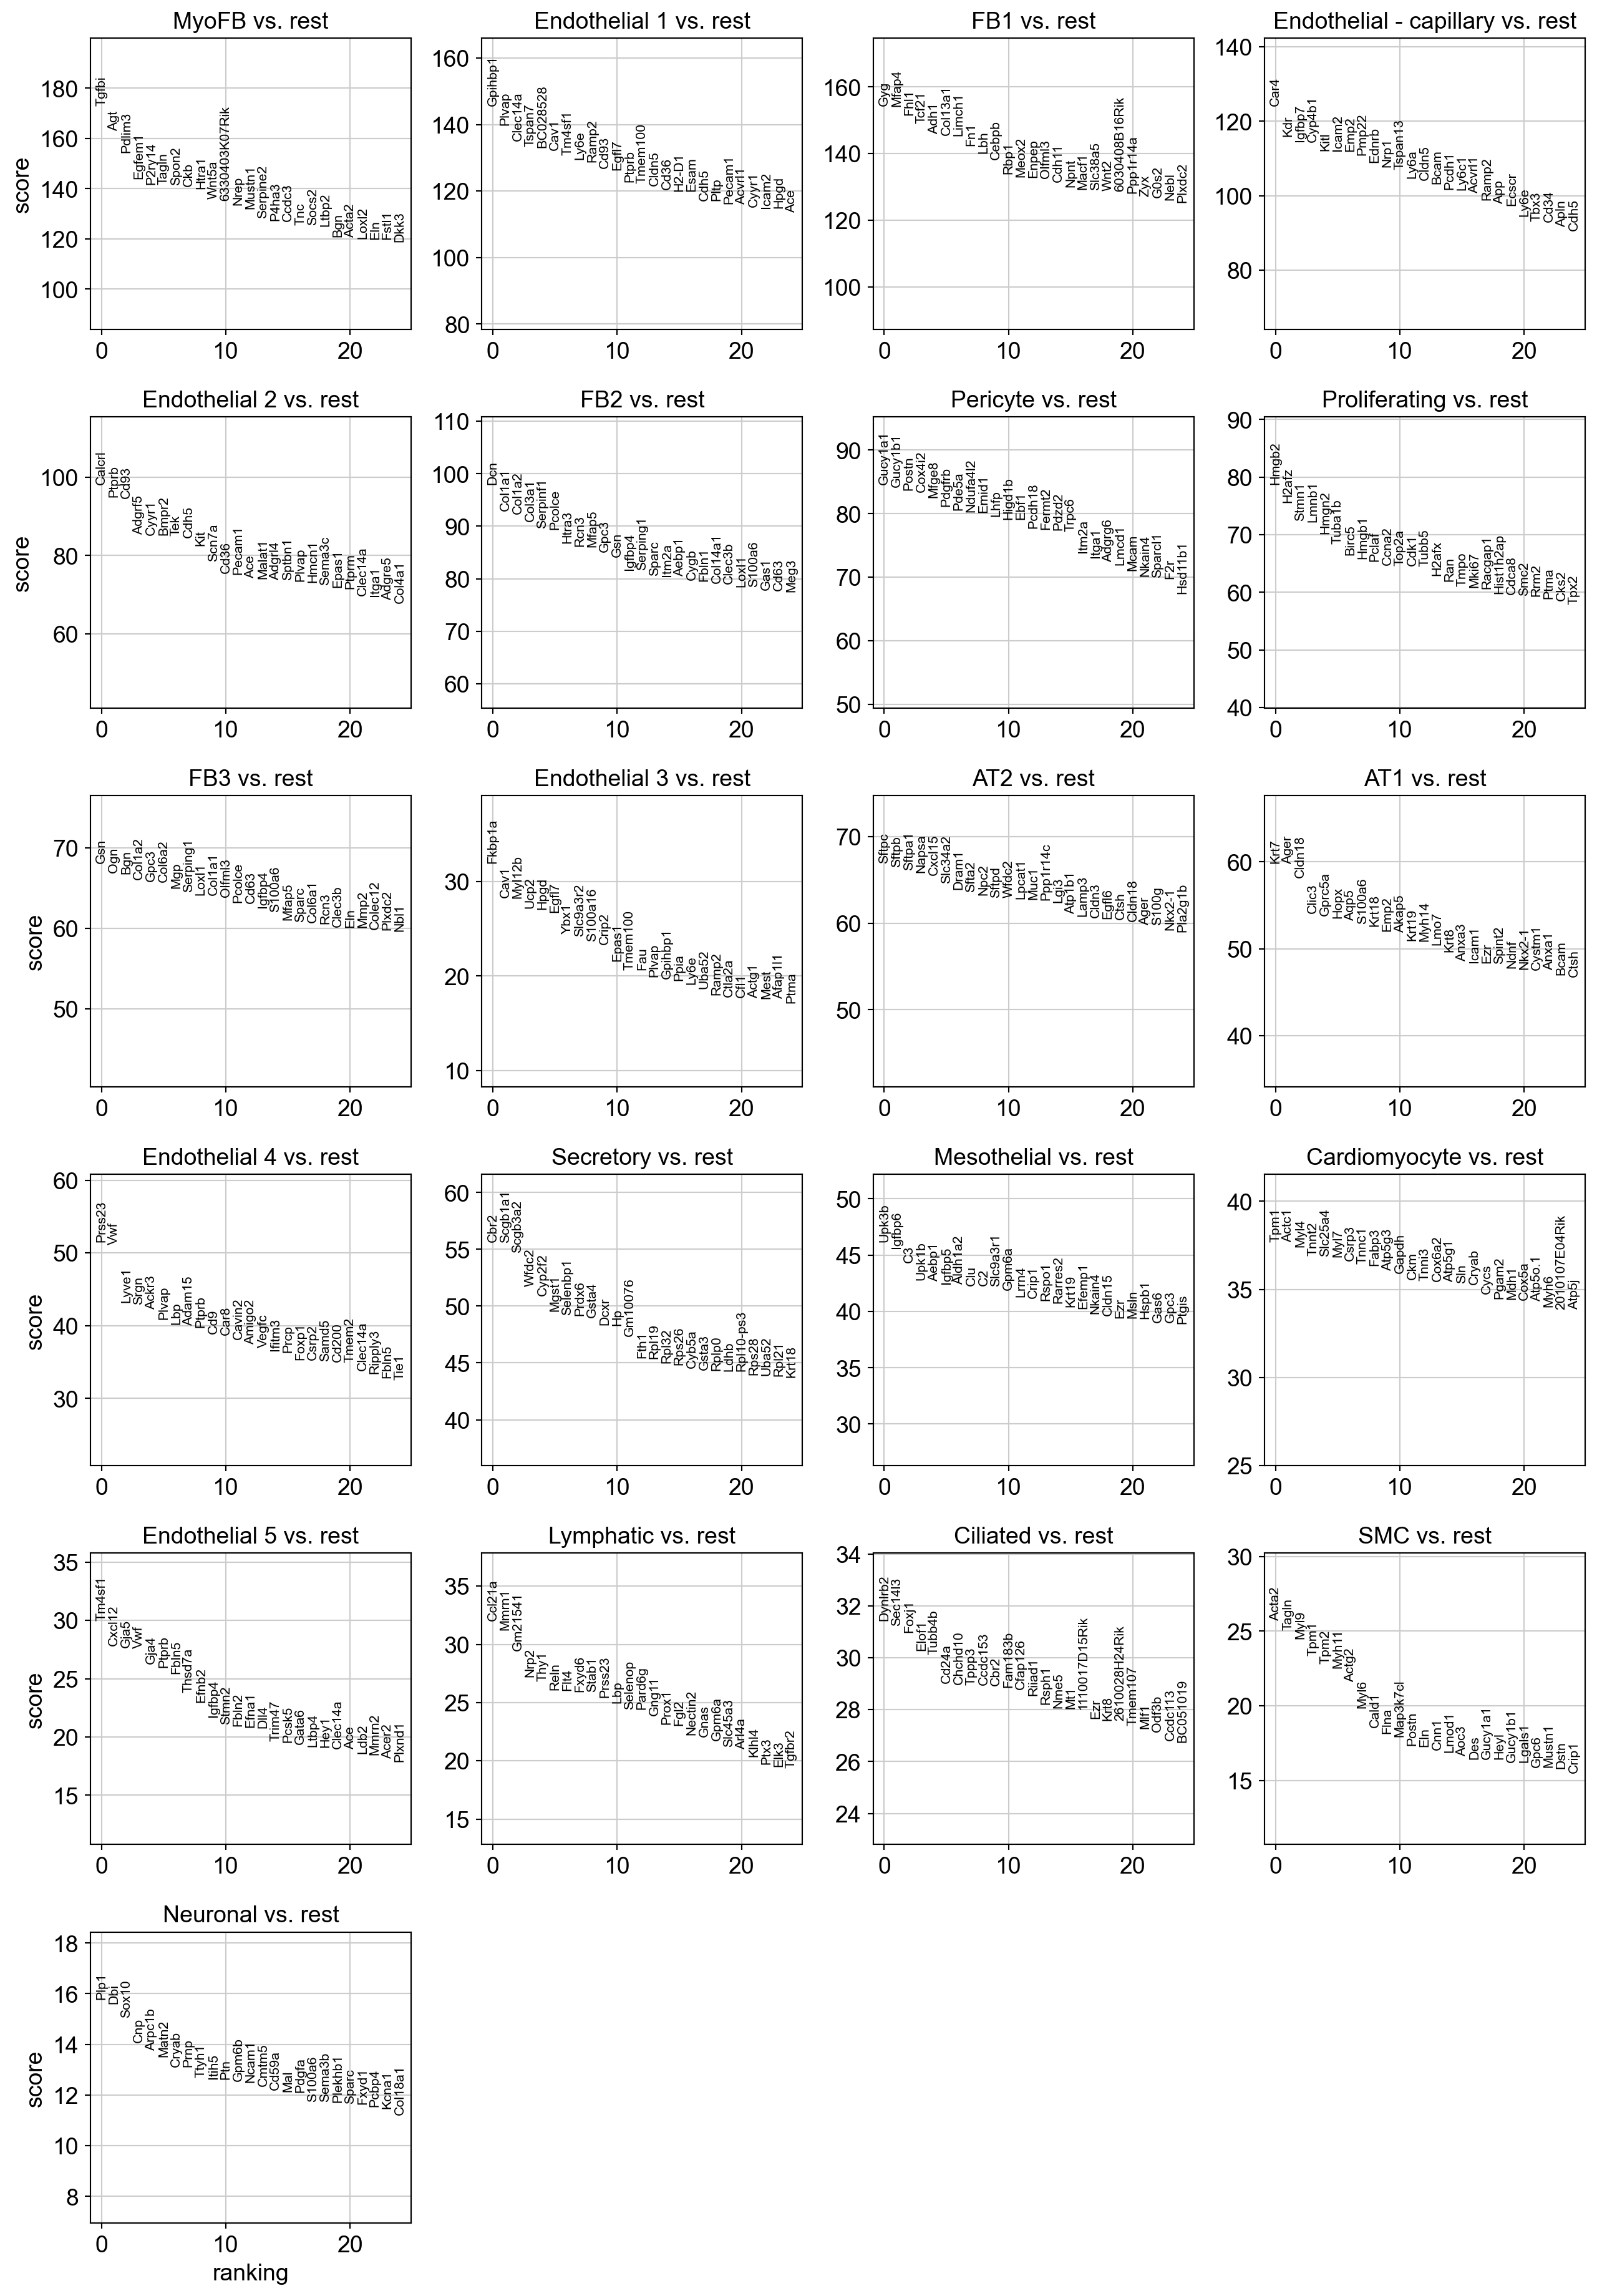

In [19]:
sc.tl.rank_genes_groups(clean, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(clean, n_genes=25, sharey=False)

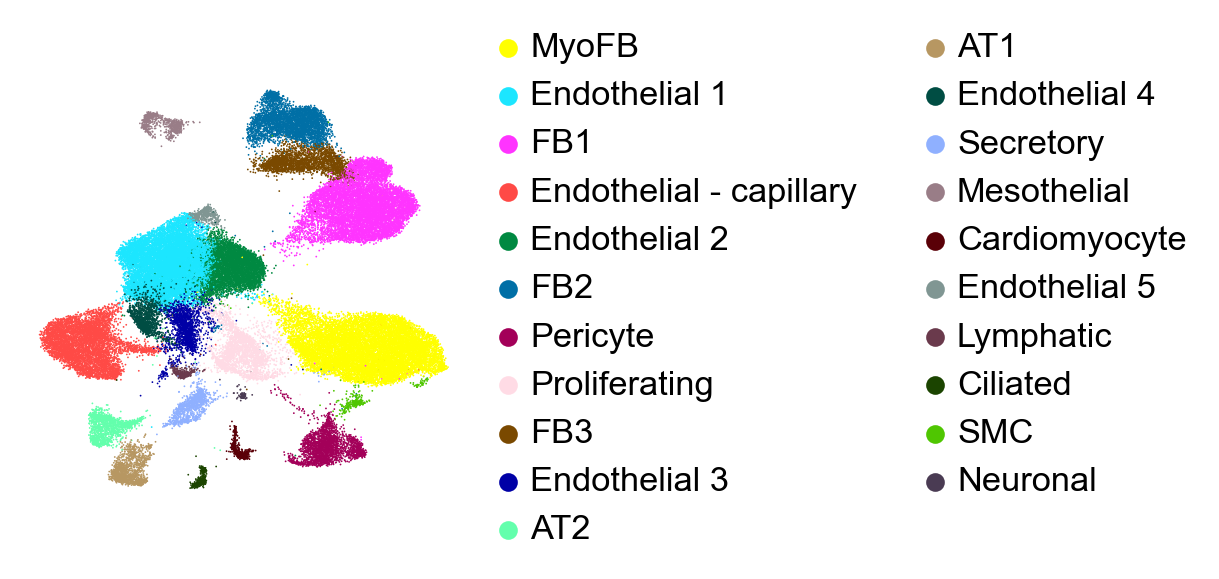

In [21]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 3,3
sc.pl.umap(clean, color = ['leiden'], frameon=False, save='cell_types.pdf', title='')

In [22]:
results_file = './lung_dev_covid_052620.h5ad'

In [23]:
clean.write(results_file)

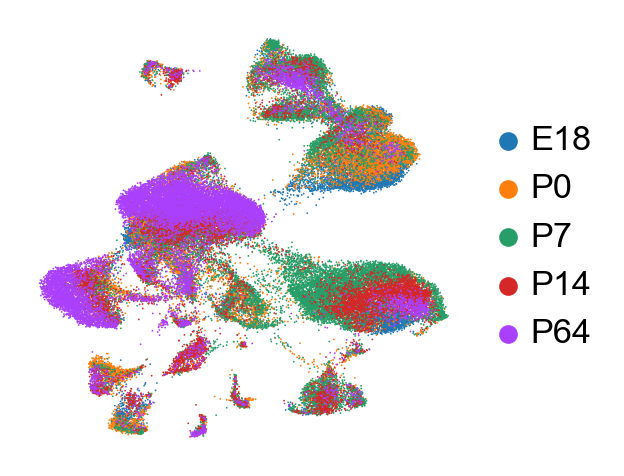

In [24]:
sc.pl.umap(clean, color=['timepoint'], frameon=False, title='', save='timepoints.pdf')

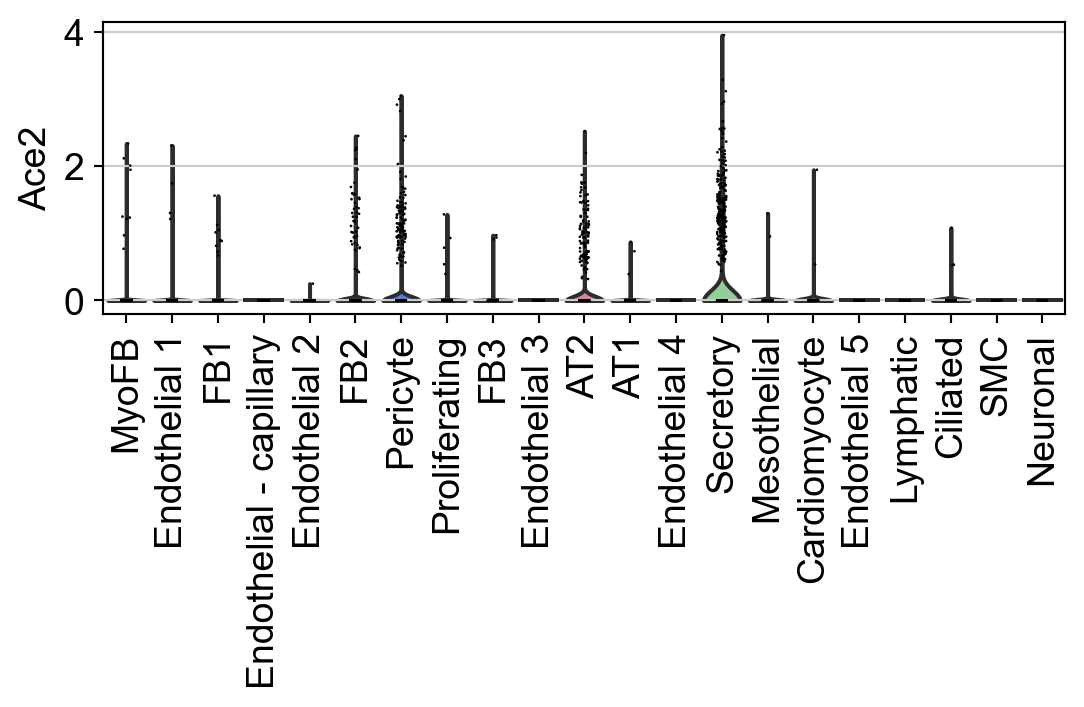

In [25]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 6,2
sc.pl.violin(clean, ['Ace2'], groupby='leiden', save='Ace2.pdf', rotation=90)

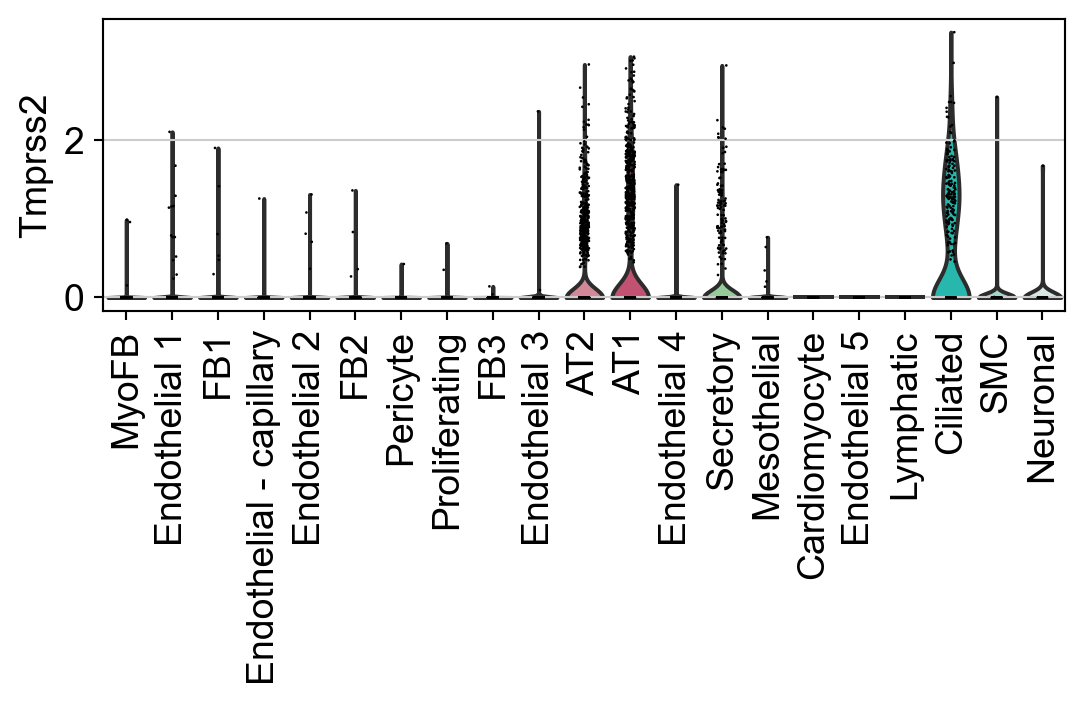

In [26]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 6,2
sc.pl.violin(clean, ['Tmprss2'], groupby='leiden', save='Tmprss2.pdf', rotation=90)

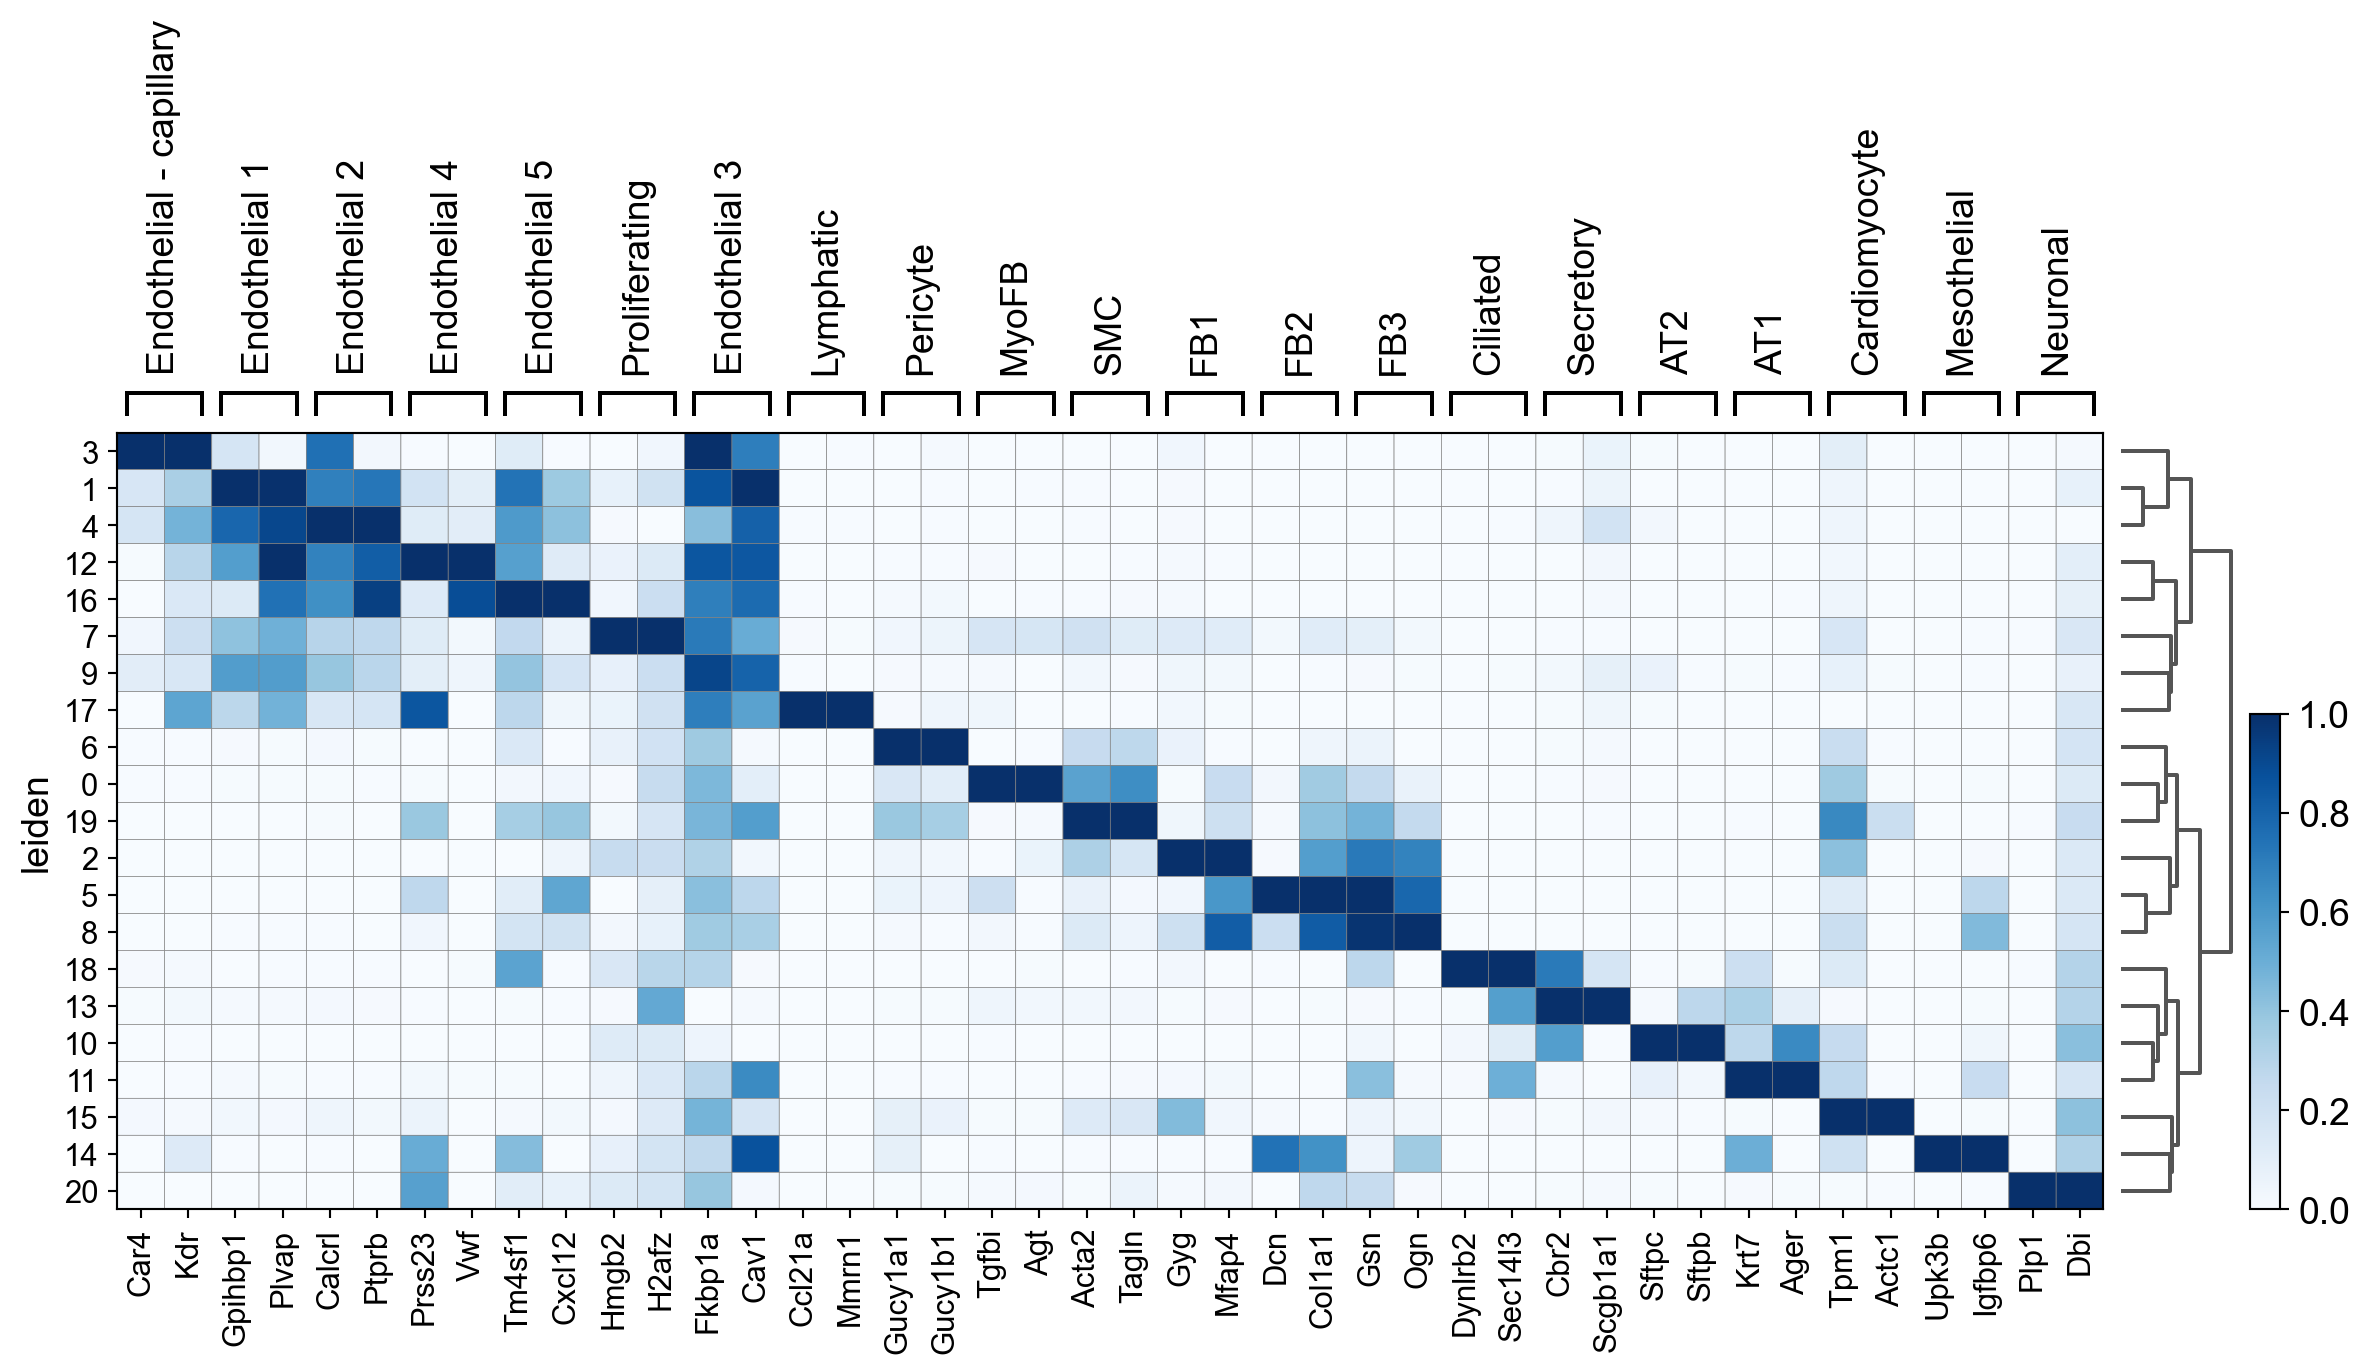

In [27]:
axs = sc.pl.rank_genes_groups_matrixplot(clean, n_genes=2, standard_scale='var', cmap='Blues', save='markers.pdf')

In [28]:
clean.write(results_file)

In [29]:
clean

AnnData object with n_obs × n_vars = 67629 × 2297 
    obs: 'library', 'timepoint', 'n_genes', 'percent_mito', 'n_counts', 'leiden'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'dendrogram_leiden', 'timepoint_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'